In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from dotenv import load_dotenv
import os
load_dotenv()


plt.rc("font", family = "NanumSquare")
sns.set(font="NanumSquare", 
rc={"axes.unicode_minus":False}, style='white')

In [61]:
enroll_status = pd.read_csv('Data/충청남도_반려동물등록률.csv', on_bad_lines='skip', delimiter=',', encoding='cp949', encoding_errors='ignore')
enroll_status.columns

Index(['시군구', '등록주체_시군구', '등록주체_대행업체', '등록주체_기타(이벤트등)', 'RFID종류_내장형',
       'RFID종류_외장형', 'RFID종류_인식표', '등록품종수', '동물소유자수', '동물소유자당동물등록수', '합계',
       '미승인', '반려'],
      dtype='object')

In [62]:
enroll_status[enroll_status['시군구']=='천안시']

,시군구,등록주체_시군구,등록주체_대행업체,등록주체_기타(이벤트등),RFID종류_내장형,RFID종류_외장형,RFID종류_인식표,등록품종수,동물소유자수,동물소유자당동물등록수,합계,미승인,반려
0,천안시,3478,29687,0,15024,13439,4702,154,25181,1.32,33165,0,35


Text(0.5, 1.0, '충청남도 도시별 동물소유자수')

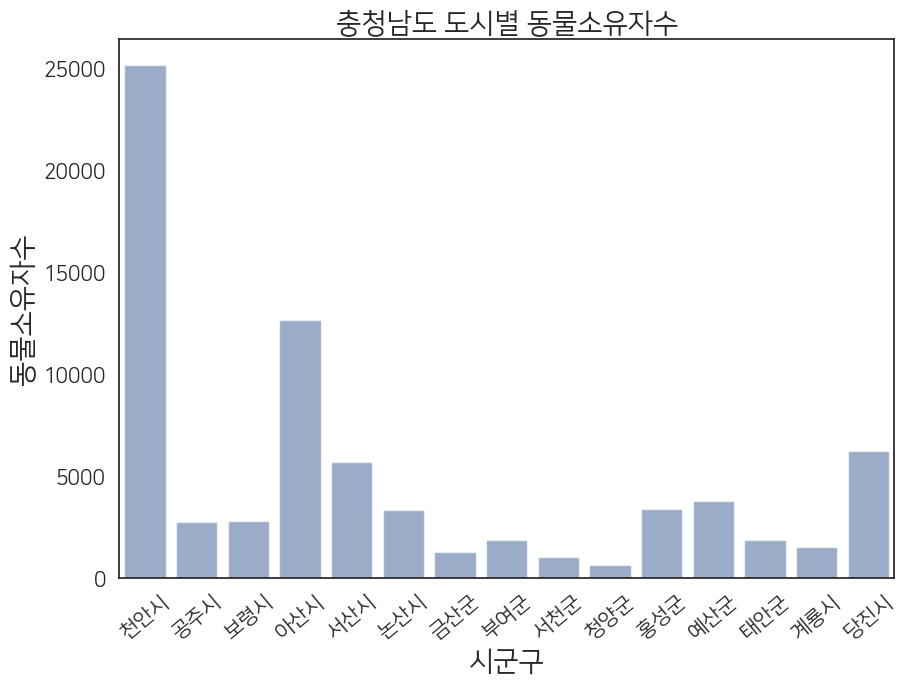

In [215]:
plt.figure(figsize=(10, 7))
sns.barplot(data=enroll_status, x='시군구', y='동물소유자수', alpha=0.6)
plt.yticks(fontsize=15)
plt.xticks(rotation=40, fontsize=15)
plt.xlabel('시군구', fontsize=20)
plt.ylabel('동물소유자수', fontsize=20)
plt.title('충청남도 도시별 동물소유자수', fontsize=20)
# enroll_status['동물소유자수']

/tmp/ipykernel_73380/2820547459.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=enroll_status, x='시군구', y='동물소유자수', palette='pastel')


Text(0.5, 1.0, '충청남도 도시별 동물소유자수')

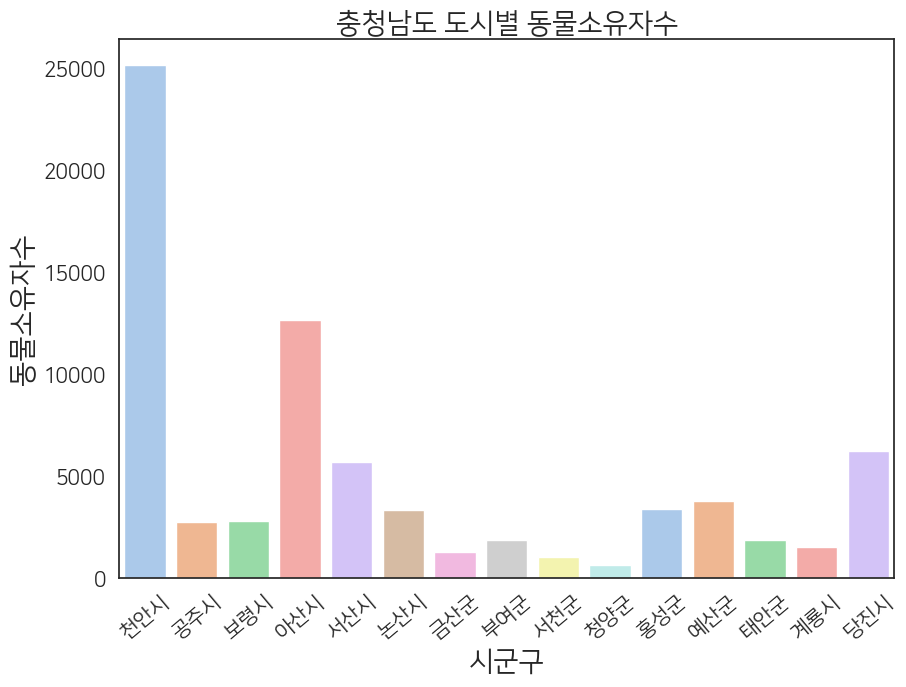

In [204]:
plt.figure(figsize=(10, 7))
sns.barplot(data=enroll_status, x='시군구', y='동물소유자수', palette='pastel')
plt.yticks(fontsize=15)
plt.xticks(rotation=40, fontsize=15)
plt.xlabel('시군구', fontsize=20)
plt.ylabel('동물소유자수', fontsize=20)
plt.title('충청남도 도시별 동물소유자수', fontsize=20)
# enroll_status['동물소유자수']

In [ ]:
data = {
    'Year': ['2020', '2021', '2022', '2023'],
    'Registered_Dogs': [27721, 34802, 39257, 40029]  # 반려견 등록 수
}

df = pd.DataFrame(data)

충청남도 내 다른 도시들보다 압도적으로 동물소유자수가 많은 도시임

In [64]:
enroll_status['시군구'].unique()

array(['천안시', '공주시', '보령시', '아산시', '서산시', '논산시', '금산군', '부여군', '서천군',
       '청양군', '홍성군', '예산군', '태안군', '계룡시', '당진시'], dtype=object)

In [65]:
population = pd.read_csv("Data/행정구역_시군구별_주민등록세대수.csv", encoding='utf-8')

# 충청남도 내 도시로 필터링
population = population[population['행정구역(시군구)별'].isin(enroll_status['시군구'].unique())]
population

,행정구역(시군구)별,2024.04,2024.05,2024.06,2024.07,2018,2019,2020,2021,2022,2023
181,천안시,309566,310208,310420,310825,273851,281333,291425,297987,302893,306418
184,공주시,53510,53617,53637,53632,50134,50519,50966,51580,52394,53019
185,보령시,49528,49549,49529,49493,47705,48324,49361,49419,49694,49709
186,아산시,162275,162789,163138,163545,132159,135159,139580,145869,152249,159108
187,서산시,84284,84396,84458,84399,75091,76748,79103,81407,82433,83565
188,논산시,57669,57676,57662,57618,56729,57196,57826,58048,58137,57648
189,계룡시,19527,19535,19538,19558,15860,15967,16531,17152,18051,19404
190,당진시,83509,83666,83784,84030,75540,76162,77661,79526,81199,83058
191,금산군,26775,26764,26751,26737,25588,25521,25897,25893,26180,26562
192,부여군,32521,32491,32473,32453,33193,33341,33562,33257,32945,32667


In [68]:
population = population[['행정구역(시군구)별','2018','2019','2020','2021','2022','2023']]

cols = ['2018','2019','2020','2021','2022','2023']
population[cols] = population[cols].apply(pd.to_numeric, errors='coerce')

population['평균'] = population[cols].mean(axis=1)


In [72]:
population

,행정구역(시군구)별,2018,2019,2020,2021,2022,2023,평균
181,천안시,273851,281333,291425,297987,302893,306418,292317.833333
184,공주시,50134,50519,50966,51580,52394,53019,51435.333333
185,보령시,47705,48324,49361,49419,49694,49709,49035.333333
186,아산시,132159,135159,139580,145869,152249,159108,144020.666667
187,서산시,75091,76748,79103,81407,82433,83565,79724.500000
188,논산시,56729,57196,57826,58048,58137,57648,57597.333333
189,계룡시,15860,15967,16531,17152,18051,19404,17160.833333
190,당진시,75540,76162,77661,79526,81199,83058,78857.666667
191,금산군,25588,25521,25897,25893,26180,26562,25940.166667
192,부여군,33193,33341,33562,33257,32945,32667,33160.833333


#### merge

In [70]:
enroll_status = enroll_status.merge(population, left_on='시군구', right_on='행정구역(시군구)별', how='left')

In [73]:
enroll_status = enroll_status.drop(columns=['행정구역(시군구)별'])
enroll_status

,시군구,등록주체_시군구,등록주체_대행업체,등록주체_기타(이벤트등),RFID종류_내장형,RFID종류_외장형,RFID종류_인식표,등록품종수,동물소유자수,동물소유자당동물등록수,합계,미승인,반려,2018,2019,2020,2021,2022,2023,평균
0,천안시,3478,29687,0,15024,13439,4702,154,25181,1.32,33165,0,35,273851,281333,291425,297987,302893,306418,292317.833333
1,공주시,320,3558,0,2342,1093,443,98,2756,1.41,3878,0,6,50134,50519,50966,51580,52394,53019,51435.333333
2,보령시,59,3773,0,1395,1587,850,104,2791,1.37,3832,0,2,47705,48324,49361,49419,49694,49709,49035.333333
3,아산시,1390,18012,0,9003,8471,1928,141,12661,1.53,19402,0,8,132159,135159,139580,145869,152249,159108,144020.666667
4,서산시,1123,6701,0,3228,3583,1013,116,5715,1.37,7824,0,2,75091,76748,79103,81407,82433,83565,79724.500000
5,논산시,196,4662,0,2637,1378,843,101,3360,1.45,4858,0,10,56729,57196,57826,58048,58137,57648,57597.333333
6,금산군,102,1805,0,939,409,559,78,1275,1.50,1907,0,3,25588,25521,25897,25893,26180,26562,25940.166667
7,부여군,98,2605,0,1607,786,310,75,1862,1.45,2703,0,0,33193,33341,33562,33257,32945,32667,33160.833333
8,서천군,91,1346,0,752,633,52,75,1058,1.36,1437,0,1,26433,26410,26794,26646,26666,26543,26582.000000
9,청양군,126,790,0,533,272,111,66,637,1.44,916,0,0,16274,16296,16378,16426,16567,16722,16443.833333


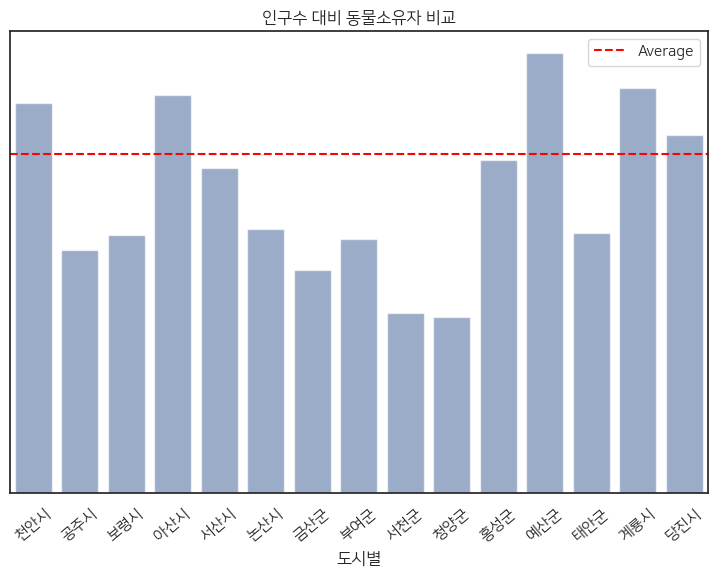

In [213]:
# 인구수 대비 동물소유자수
plt.figure(figsize=(9, 6))
sns.barplot(data=enroll_status, x='시군구', y=enroll_status['동물소유자수']/enroll_status['평균']*100,alpha=0.6)
plt.xticks(rotation=40)
plt.title('인구수 대비 동물소유자 비교')
plt.xlabel('도시별')
plt.ylabel('')
plt.yticks([])

# Calculate the average value
average_value = enroll_status['동물소유자수'].mean() / enroll_status['평균'].mean() * 100

# Plot the average line
plt.axhline(average_value, color='red', linestyle='--', label='Average')

plt.legend()
plt.show()

/tmp/ipykernel_73380/4002881989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=enroll_status, x='시군구', y=enroll_status['동물소유자수']/enroll_status['평균']*100,palette='pastel',alpha=0.5)


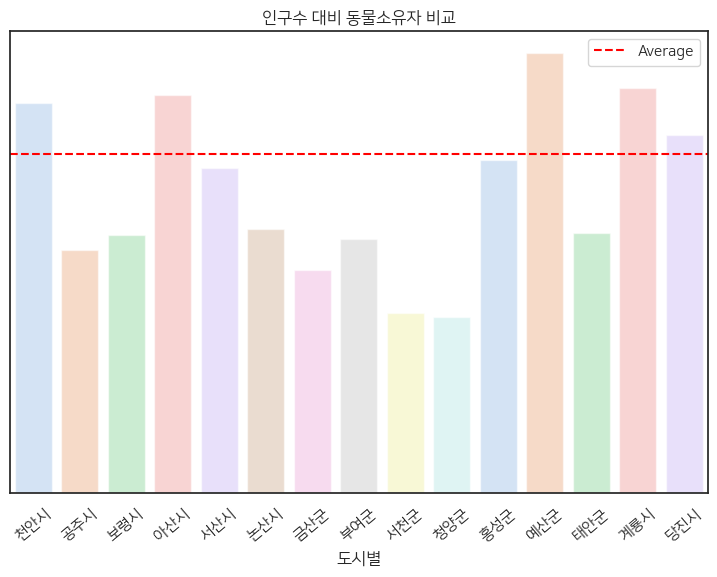

In [211]:
# 인구수 대비 동물소유자수
plt.figure(figsize=(9, 6))
sns.barplot(data=enroll_status, x='시군구', y=enroll_status['동물소유자수']/enroll_status['평균']*100,palette='pastel',alpha=0.5)
plt.xticks(rotation=40)
plt.title('인구수 대비 동물소유자 비교')
plt.xlabel('도시별')
plt.ylabel('')
plt.yticks([])

# Calculate the average value
average_value = enroll_status['동물소유자수'].mean() / enroll_status['평균'].mean() * 100

# Plot the average line
plt.axhline(average_value, color='red', linestyle='--', label='Average')

plt.legend()
plt.show()

충청남도 내 도시 중 인구수 대비 동물소유자가 많은 도시에 속함

In [86]:
cultural_facil = pd.read_csv("Data/전국반려동물동반가능문화시설.csv", encoding='utf-8')
cultural_facil.columns

Index(['FCLTY_NM', 'CTGRY_ONE_NM', 'CTGRY_TWO_NM', 'CTGRY_THREE_NM',
       'CTPRVN_NM', 'SIGNGU_NM', 'LEGALDONG_NM', 'LI_NM', 'LNBR_NO', 'ROAD_NM',
       'BULD_NO', 'LC_LA', 'LC_LO', 'ZIP_NO', 'RDNMADR_NM', 'LNM_ADDR',
       'TEL_NO', 'HMPG_URL', 'RSTDE_GUID_CN', 'OPER_TIME', 'PARKNG_POSBL_AT',
       'UTILIIZA_PRC_CN', 'PET_POSBL_AT', 'PET_INFO_CN',
       'ENTRN_POSBL_PET_SIZE_VALUE', 'PET_LMTT_MTR_CN',
       'IN_PLACE_ACP_POSBL_AT', 'OUT_PLACE_ACP_POSBL_AT', 'FCLTY_INFO_DC',
       'PET_ACP_ADIT_CHRGE_VALUE', 'LAST_UPDT_DE'],
      dtype='object')

In [88]:
cultural_facil['CTPRVN_NM'].unique()

array(['경기도', '전라남도', '서울특별시', '인천광역시', '경상북도', '대구광역시', '세종특별자치시',
       '전라북도', '경상남도', '강원도', '부산광역시', '광주광역시', '대전광역시', '충청북도',
       '제주특별자치도', '충청남도', '울산광역시'], dtype=object)

In [91]:
culural_facil_chungnam = cultural_facil[cultural_facil['CTPRVN_NM']=='충청남도']
culural_facil_chungnam['SIGNGU_NM'].unique()

array(['홍성군', '천안시 서북구', '논산시', '아산시', '보령시', '금산군', '천안시 동남구', '부여군',
       '공주시', '계룡시', '예산군', '당진시', '태안군', '서천군', '서산시', '청양군'],
      dtype=object)

In [93]:
enroll_status['시군구'].unique()

array(['천안시', '공주시', '보령시', '아산시', '서산시', '논산시', '금산군', '부여군', '서천군',
       '청양군', '홍성군', '예산군', '태안군', '계룡시', '당진시'], dtype=object)

In [97]:
culural_facil_chungnam.loc[culural_facil_chungnam['SIGNGU_NM'].isin(['천안시 서북구', '천안시 동남구']), 'SIGNGU_NM'] = '천안시'

In [99]:
# culural_facil_chungnam['SIGNGU_NM']
culural_facil_chungnam['SIGNGU_NM'].value_counts()

SIGNGU_NM
천안시    302
아산시    146
당진시     75
태안군     70
서산시     69
보령시     50
홍성군     47
공주시     47
논산시     43
예산군     35
부여군     34
금산군     23
계룡시     20
서천군     19
청양군     13
Name: count, dtype: int64

In [145]:
# 파라미터 설정 (API 요청에 필요한 파라미터에 따라 설정)
params = {
    'API_KEY': os.getenv('PublicDataPotal_key'),  # API 키
    'TYPE': 'json',  
    'CTPV': '천안시', 
    'LVSTCK_KND': '개',
}

# API 정보 설정
api_key = os.getenv('PublicDataPotal_key')  
base_url = 'http://211.237.50.150:7080/openapi/sample/json/Grid_20210806000000000612_1/1/5'

# 요청 URL 설정
url = f"{base_url}?API_KEY={api_key}&TYPE=json&START_INDEX=1&END_INDEX=5"

params = {
    'CTPV': '충청남도',  # 선택 사항: 시도
    'SGG': '천안시',  # 선택 사항: 시군구
    'BRDT': '2022', # 생년
    'LVSTCK_KND': '개'  # 선택 사항: 축종
}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 상태 코드 확인
if response.status_code == 200:
    print("API 요청 성공")
    data = response.json()  # JSON 데이터를 파이썬 딕셔너리로 변환
    print(data)  # 데이터를 출력하거나 처리
else:
    print(f"API 요청 실패. 상태 코드: {response.status_code}")

API 요청 성공
{'Grid_20210806000000000612_1': {'totalCnt': 2524, 'startRow': 1, 'endRow': 5, 'result': {'code': 'INFO-000', 'message': '정상 처리되었습니다.'}, 'row': [{'ROW_NUM': 1, 'CTPV': '충청남도', 'SGG': '천안시', 'BRDT': '2015', 'RFID_SE': '내장형', 'LVSTCK_KND': '개', 'SPCS': '시츄', 'CNT': 62}, {'ROW_NUM': 2, 'CTPV': '충청남도', 'SGG': '천안시', 'BRDT': '2015', 'RFID_SE': '내장형', 'LVSTCK_KND': '개', 'SPCS': '실키테리어', 'CNT': 1}, {'ROW_NUM': 3, 'CTPV': '충청남도', 'SGG': '천안시', 'BRDT': '2015', 'RFID_SE': '외장형', 'LVSTCK_KND': '개', 'SPCS': '아메리칸 코카 스파니엘', 'CNT': 2}, {'ROW_NUM': 4, 'CTPV': '충청남도', 'SGG': '천안시', 'BRDT': '2015', 'RFID_SE': '인식표', 'LVSTCK_KND': '개', 'SPCS': '아메리칸 코카 스파니엘', 'CNT': 1}, {'ROW_NUM': 5, 'CTPV': '충청남도', 'SGG': '천안시', 'BRDT': '2015', 'RFID_SE': '내장형', 'LVSTCK_KND': '개', 'SPCS': '아메리칸 코카 스파니엘', 'CNT': 3}]}}


In [125]:
print(response.text)

{"Grid_20210806000000000612_1":{"totalCnt":2524,"startRow":1,"endRow":5,"result":{"code":"INFO-000","message":"정상 처리되었습니다."},"row":[{"ROW_NUM":1,"CTPV":"충청남도","SGG":"천안시","BRDT":"2015","RFID_SE":"내장형","LVSTCK_KND":"개","SPCS":"시츄","CNT":62},{"ROW_NUM":2,"CTPV":"충청남도","SGG":"천안시","BRDT":"2015","RFID_SE":"내장형","LVSTCK_KND":"개","SPCS":"실키테리어","CNT":1},{"ROW_NUM":3,"CTPV":"충청남도","SGG":"천안시","BRDT":"2015","RFID_SE":"외장형","LVSTCK_KND":"개","SPCS":"아메리칸 코카 스파니엘","CNT":2},{"ROW_NUM":4,"CTPV":"충청남도","SGG":"천안시","BRDT":"2015","RFID_SE":"인식표","LVSTCK_KND":"개","SPCS":"아메리칸 코카 스파니엘","CNT":1},{"ROW_NUM":5,"CTPV":"충청남도","SGG":"천안시","BRDT":"2015","RFID_SE":"내장형","LVSTCK_KND":"개","SPCS":"아메리칸 코카 스파니엘","CNT":3}]}}


In [128]:
Cheonan = pd.read_csv("Data/천안시_동물등록현황_2024.csv", encoding='cp949')


In [130]:
Cheonan['생년'].unique()

array([2015, 2019, 2023, 2013, 2014, 2018, 2011, 2012, 2016, 2020, 2024,
       2003, 2004, 2017, 2005, 2021, 2006, 1989, 1990, 1992, 1993, 1995,
       1996, 1997, 1998, 2007, 1999, 2000, 2001, 2008, 2022, 2009, 2010,
       2002])

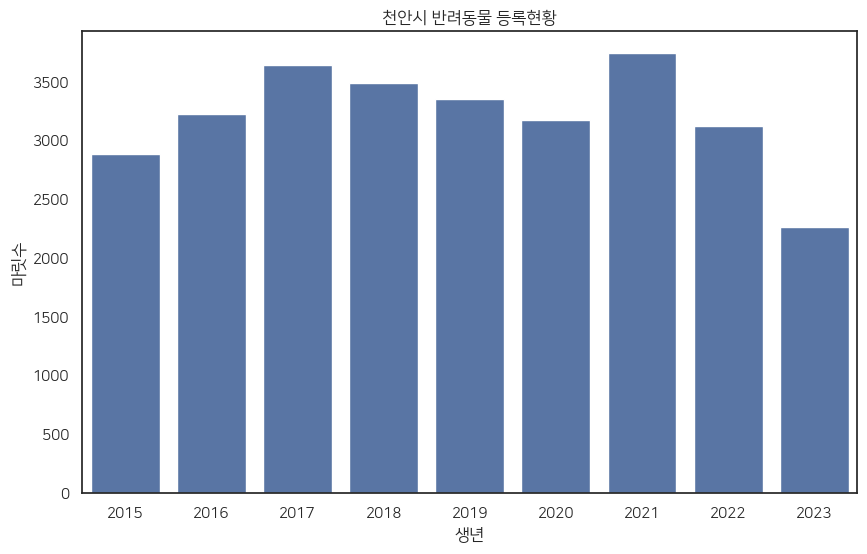

In [143]:
df = Cheonan[(Cheonan['생년']>2014) & (Cheonan['생년']!=2024)].groupby('생년', as_index=False)['마릿수'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x='생년', y='마릿수', data=df)
plt.title('천안시 반려동물 등록현황')
plt.show()

In [216]:
data = {
    'Year': ['2020', '2021', '2022', '2023'],
    'Registered_Dogs': [27721, 34802, 39257, 40292]  # 반려견 등록 수
}

df = pd.DataFrame(data)

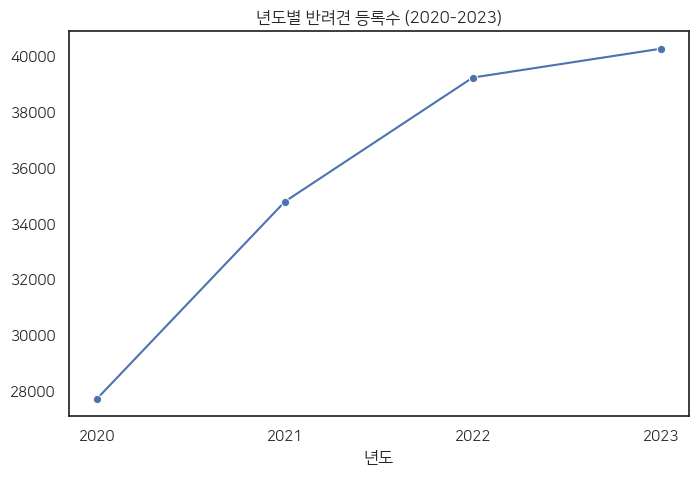

In [217]:
sns.set(font="NanumSquare", 
rc={"axes.unicode_minus":False}, style='white')

plt.figure(figsize=(8, 5))
sns.lineplot(x='Year', y='Registered_Dogs', data=df, marker='o')
plt.xlabel('년도')
plt.ylabel('')


plt.title('년도별 반려견 등록수 (2020-2023)')
plt.show()


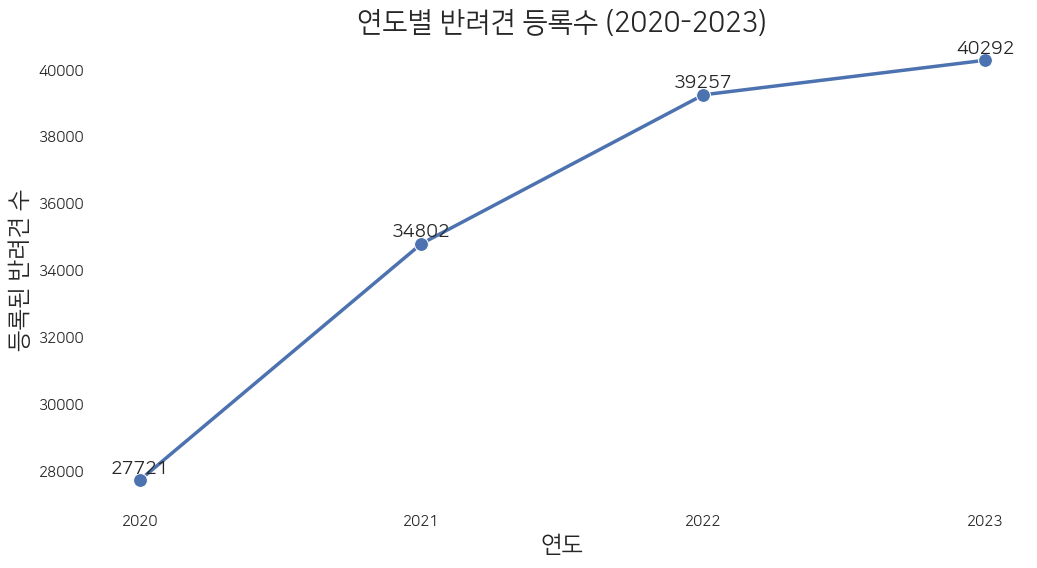

In [218]:


# 라인 플롯 생성
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Registered_Dogs', data=df, marker='o', markersize=10, linewidth=2.5)

# 데이터 포인트에 값 표시
for i in range(df.shape[0]):
    plt.text(df['Year'][i], df['Registered_Dogs'][i] + 200, df['Registered_Dogs'][i], ha='center', fontsize=14)

# 그래프 제목과 레이블 설정
plt.title('연도별 반려견 등록수 (2020-2023)', fontsize=20)
plt.xlabel('연도', fontsize=17)
plt.ylabel('등록된 반려견 수', fontsize=17)

# 스타일 개선
sns.despine(left=True, bottom=True)

# 그래프 표시
plt.show()

/tmp/ipykernel_73380/1017863190.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Registered_Dogs', data=df, alpha=0.3, ax=ax2, palette='pastel')


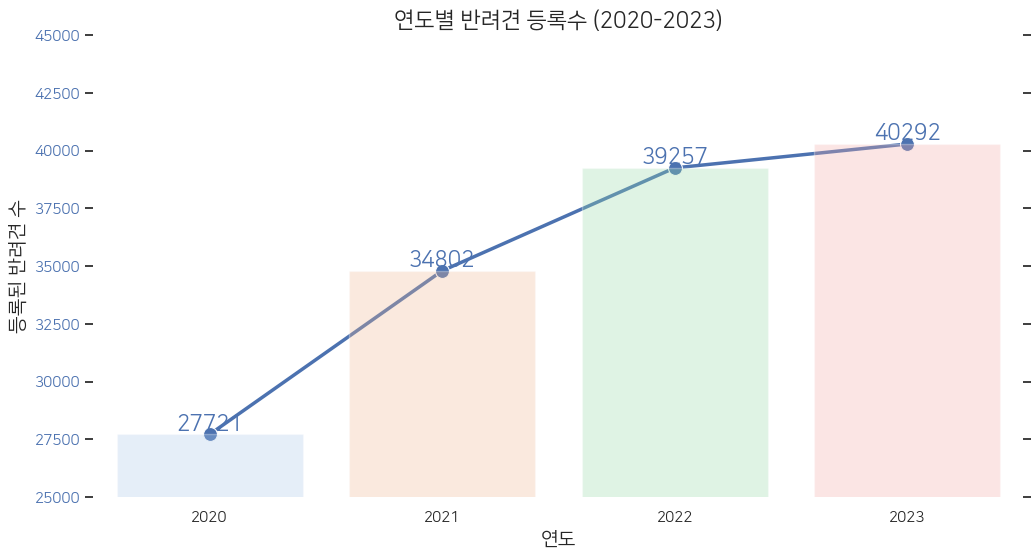

In [219]:
# 기본 그림과 축 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 축에 라인 플롯 생성
sns.lineplot(x='Year', y='Registered_Dogs', data=df, marker='o', markersize=10, linewidth=2.5, ax=ax1, color='b')
ax1.set_ylabel('등록된 반려견 수', fontsize=14)
ax1.set_xlabel('연도', fontsize=14)
ax1.tick_params(axis='y', labelcolor='b')

# 데이터 포인트에 값 표시
for i in range(df.shape[0]):
    ax1.text(df['Year'][i], df['Registered_Dogs'][i] + 200, df['Registered_Dogs'][i], ha='center', color='b', fontsize=16)

# 두 번째 축 생성 (막대 그래프용)
ax2 = ax1.twinx()

# 두 번째 축에 막대 그래프 생성
sns.barplot(x='Year', y='Registered_Dogs', data=df, alpha=0.3, ax=ax2, palette='pastel')
ax2.set_ylabel('', fontsize=14, color='g')
ax2.set_yticklabels([])

# 두 축의 y축 범위를 동일하게 설정
ax1.set_ylim(25000, 45000)  # 라인 플롯 y축 범위
ax2.set_ylim(25000, 45000)  # 막대 그래프 y축 범위

# 그래프 제목 설정
plt.title('연도별 반려견 등록수 (2020-2023)', fontsize=16)

# 스타일 개선
sns.despine(left=True, bottom=True)

# 그래프 표시
plt.show()